<a href="https://colab.research.google.com/github/Manuel-Gomez-05/SenalesySistemas2/blob/main/repaso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
diccionario={
    "nombre":"manuel",
    "edad":"21 años ",
    "ciudad":"guatemala",
    "carrera":"ingenieria en sistemas"
}
diccionario["telefono"]="3234299705"
diccionario["barrio"]="palermo"
#print(diccionario)

print("ingrese su nombre")
nombre=input()
print("ingrese su edad")
edad=input()
print("ingrese su ciudad")
ciudad=input()
print("ingrese su salario mensual")
salario=input()


if int(salario)>100000:
  print("buen salario")
elif int(salario)<100000:
  print("mal salario")
else:
  print("trabaja")

ingrese su nombre
manuel
ingrese su edad
21
ingrese su ciudad
manizales
ingrese su salario mensual
102000
buen salario


In [ ]:
numeros=[1,2,2,3,4,5,5]
cantidad=len(numeros)
print(cantidad)
numeros.insert(2,"mama")
print(numeros)
numeros.append(98)
print(numeros)
print(numeros[1])
numeros.reverse()
print(numeros)
print(numeros[1])

7
[1, 2, 'mama', 2, 3, 4, 5, 5]
[1, 2, 'mama', 2, 3, 4, 5, 5, 98]
2
[98, 5, 5, 4, 3, 2, 'mama', 2, 1]
5


In [ ]:
#para simular señales , debemos de crear vectores:
#linspace :
#tenemos una señal que va desde 0 hasta 2s y con un numero de muestras de 50

x=np.linspace(0,2,5)
print(x)
print(f"el numero de muestras fueron : {len(x)} ")

#otra forma de hacerlo es con np.arange , esta sirve cuando sabemos el periodo de muestra , cuanto saltos queremos realizar

#tenemos una señal de o a 2s , y nos dan una frecuencia de muesttreo de 500Hz
start = 0
stop = 1
Fs= 1000
Ts=1/Fs

y=np.arange(start,stop,Ts)
print(y)
print(f"el numero de muestras fueron : {len(y)} ")

[0.  0.5 1.  1.5 2. ]
el numero de muestras fueron : 5 
[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107
 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119
 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131
 0.132 0.133 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143
 0.144 0.145 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0

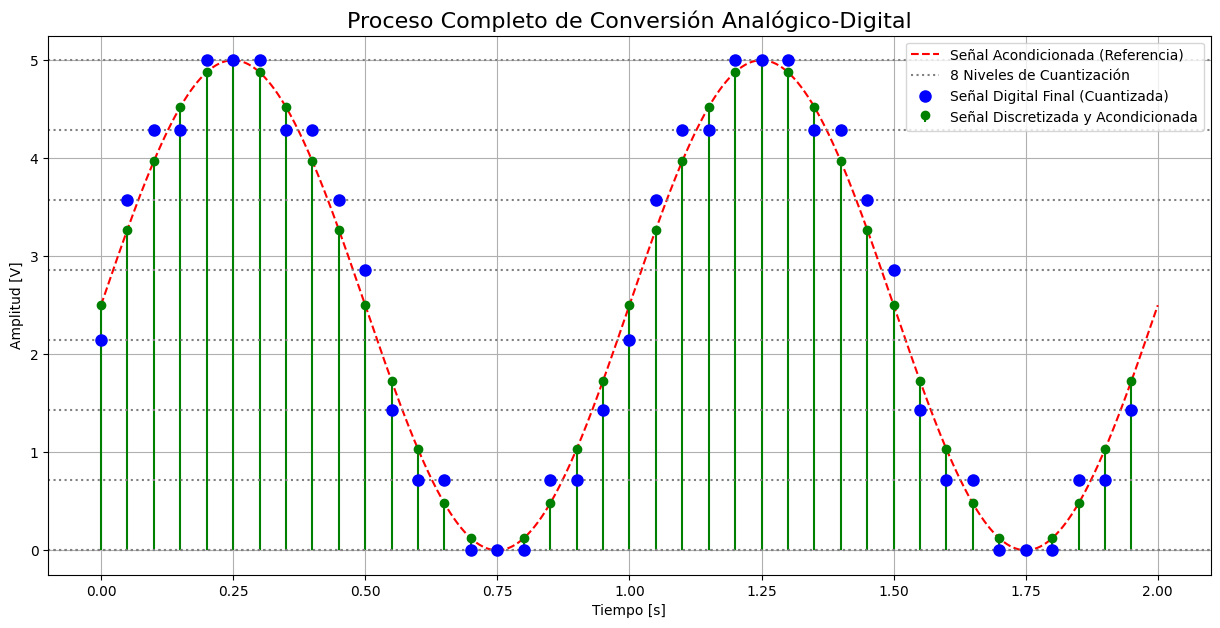

In [ ]:
#Vamos a simular el proceso completo de un Convertidor Analógico-Digital (ADC). El objetivo es tomar una señal senoidal continua ideal y convertirla en una señal digital de 3 bits que opera entre 0V y 5V.

import numpy as np
import matplotlib.pyplot as plt

#PASO 1: definir los parametros de la señal
#parametros de la señal analoga original

A = 2.5      # Amplitud de 2.5 V
Fo = 1       # Frecuencia de 1 Hz
T_periodo = 1/Fo # Período de la señal

# Parámetros del sistema de digitalización (nuestro ADC)
Fs = 20      # Frecuencia de muestreo de 20 Hz (cumple Nyquist Fs > 2*Fo)
Ts = 1/Fs    # Período de muestreo (el tiempo entre cada muestra)
nbits = 3    # Número de bits de nuestro ADC
Vmin = 0     # Voltaje mínimo del ADC
Vmax = 5     # Voltaje máximo del ADC

#  PASO 2: DISCRETIZACIÓN (MUESTREO)
# Aquí convertimos la señal de tiempo continuo a tiempo discreto.

# 2.1 - Creamos el vector de tiempo discreto. Usamos arange porque tenemos Ts.
# Simularemos 2 períodos de la señal.
tv_discreto = np.arange(0, 2 * T_periodo, Ts)

# 2.2 - Calculamos el valor de la señal ÚNICAMENTE en esos instantes de tiempo.
# OJO: La señal original vive en el mundo real, pero nosotros solo la "vemos" en los puntos de tv_discreto.
x_discreta = A * np.sin(2 * np.pi * Fo * tv_discreto)

# --- PASO 3: ACONDICIONAMIENTO (CERO Y PENDIENTE) ---
# Ajustamos la amplitud de nuestra señal discreta para que encaje en el rango de nuestro ADC (0V a 5V).
# La señal original va de -2.5V a +2.5V.

# 3.1 - Definimos la función de acondicionamiento (cero y pendiente).
def my_ceropen(x, ymin, ymax):
  xmax = np.max(x)
  xmin = np.min(x)
  m = (ymax - ymin) / (xmax - xmin)
  c = ymin - m * xmin
  return m * x + c

# 3.2 - Aplicamos la función a nuestra señal discreta.
x_acondicionada = my_ceropen(x_discreta, ymin=Vmin, ymax=Vmax)

# --- PASO 4: CUANTIZACIÓN ---
# Aquí convertimos la señal de amplitud continua a amplitud discreta.
# Cada muestra de x_acondicionada será "redondeada" al nivel de voltaje más cercano permitido por nuestro ADC de 3 bits.

# 4.1 - Calculamos los niveles de voltaje permitidos.
# Un ADC de 3 bits tiene 2^3 = 8 niveles.
niveles = np.linspace(Vmin, Vmax, 2**nbits)

# 4.2 - Creamos una lista vacía para guardar nuestra señal digital final.
x_digital = []

# 4.3 - Iteramos sobre cada muestra de la señal acondicionada.
for muestra in x_acondicionada:
    # Para cada muestra, calculamos la distancia a TODOS los niveles permitidos.
    distancias = np.abs(niveles - muestra)

    # Encontramos el ÍNDICE del nivel que tuvo la distancia MÍNIMA.
    indice_cercano = np.argmin(distancias)

    # Obtenemos el valor de voltaje de ese nivel más cercano.
    valor_cuantizado = niveles[indice_cercano]

    # Añadimos este valor cuantizado a nuestra señal digital.
    x_digital.append(valor_cuantizado)

# Convertimos la lista a un arreglo de NumPy para facilitar el graficado.
x_digital = np.array(x_digital)


# --- PASO 5: VISUALIZACIÓN DE TODO EL PROCESO ---
plt.figure(figsize=(15, 7))

# Graficamos la señal original "analógica" como referencia.
t_continuo = np.linspace(0, 2 * T_periodo, 1000)
x_continuo_original = A * np.sin(2 * np.pi * Fo * t_continuo)
x_continuo_acondicionado = my_ceropen(x_continuo_original, ymin=Vmin, ymax=Vmax)
plt.plot(t_continuo, x_continuo_acondicionado, 'r--', label='Señal Acondicionada (Referencia)')

# Graficamos la señal después de la discretización y acondicionamiento.
plt.stem(tv_discreto, x_acondicionada, linefmt='g-', markerfmt='go', basefmt=' ', label='Señal Discretizada y Acondicionada')

# Graficamos los niveles de cuantización permitidos.
for nivel in niveles:
    plt.axhline(y=nivel, color='gray', linestyle=':')
plt.axhline(y=niveles[0], color='gray', linestyle=':', label=f'{2**nbits} Niveles de Cuantización')


# Graficamos la señal digital final.
plt.plot(tv_discreto, x_digital, 'bo', markersize=8, label='Señal Digital Final (Cuantizada)')

plt.title('Proceso Completo de Conversión Analógico-Digital', fontsize=16)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
#clases, atributos y metodos
#una clase es una forma de organizar y estructurar codigo , en este asignan variables las cuales son atributos de la clase y tambien se asignan funciones que cumple dicha clase las cuales son llamadas metodos

class coche:
  nombre="toyota"  #estos serian atributos de la clase coche
  modelo="carulla"
  año="2020"

  def acelerar(self,velocidad):
    print("el coche esta acelerando a"+str(velocidad))

  def frenar(self):
    print("el coche esta frenando")

  def girar(self,direecion):
    print(("el coche esta girando la "+ direecion))

carro=coche()
print(carro.nombre)
carro.girar("derecha")
carro.acelerar(300)

toyota
el coche esta girando la derecha
el coche esta acelerando a300


In [42]:
#herencias
#son una clase derivada de otra clase ,la herencia es conocida como subclase que puede heredar los atributos y metodos de la clase base , ademas de que tambien puede agregar propios

class empleado:
  def __init__(self,nombre,edad,salario):
    self.nombre=nombre
    self.edad=edad
    self.salario=salario
  def obtener_salario(self):
    return self.salario
class empleado_asalariado(empleado):
  def __init__(self,nombre,edad,salario,bono):
    super().__init__(nombre,edad,salario) #suoer es una funcion de python que permite llamar a metodos de una clase base desde una herencia
    self.bono=bono

  def obtener_salario(self):
    return self.salario+self.bono

# Creamos una instancia de la clase base
empleado1 = empleado("Juan", 30, 2000)
print(empleado1.obtener_salario())

# Creamos una instancia de la clase derivada
empleado2 = empleado_asalariado("Pedro", 25, 2500, 500)
print(empleado2.obtener_salario())

2000
3000
